In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("thyroid_dataset.csv")

In [3]:
df.head()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label
0,0.45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,61.0,6.0,23.0,87.0,26.0,o
1,0.61,0,0,0,0,1,0,0,0,0,...,0,0,0,0,29.0,15.0,61.0,96.0,64.0,o
2,0.16,0,1,0,0,0,0,0,0,0,...,0,1,0,0,29.0,19.0,58.0,103.0,56.0,o
3,0.85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,114.0,3.0,24.0,61.0,39.0,o
4,0.75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,49.0,3.0,5.0,116.0,4.0,o


In [4]:
X = df.drop("Outlier_label" , axis = 1)
y = df["Outlier_label"]

In [5]:
# scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# LOF

from sklearn.neighbors import LocalOutlierFactor

neighbors = LocalOutlierFactor(contamination=0.036)

labels = neighbors.fit_predict(X)

In [14]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_scaled)

Text(0, 0.5, 'PC2')

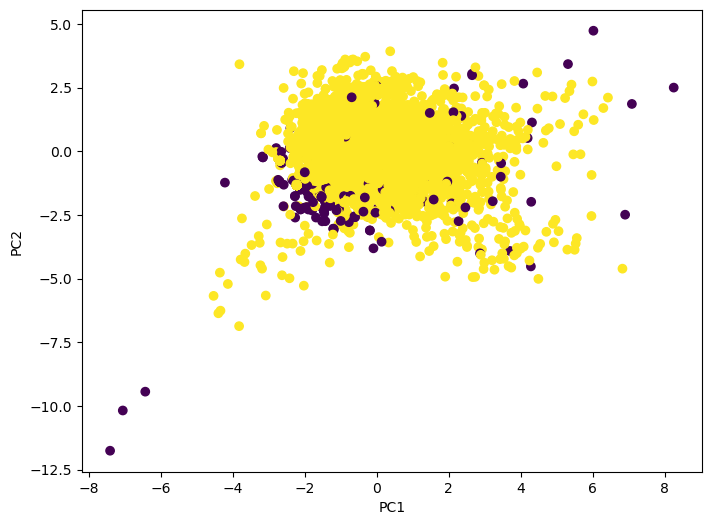

In [15]:
# visulalize 

plt.figure(figsize = (8, 6))

plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1], c=labels)
plt.xlabel("PC1")
plt.ylabel("PC2")

In [16]:
import numpy as np

n_outliers = np.sum(labels == -1)
n_normal = np.sum(labels == 1)

print(f"Outliers = {n_outliers}")
print(f"Normal = {n_normal}")

Outliers = 249
Normal = 6667
